###### Problem c
1	Convolution: in channels = 3, outchannels = 16, kernel size=5, padding = 2;\
    MaxPooling: kernel size = 2, stride = 2	\
size: [16,3,5,5]\
parameter :1201\
2	Convolution: in channels = 16, outchannels = 16, kernel size=5, padding = 2;\
MaxPooling: kernel size = 2, stride = 2	\
size: [16,16,5,5]\
parameter :6401\
3	Convolution: in channels = 16, outchannels = 32, kernel size=5, padding = 2;\
    MaxPooling: kernel size = 2, stride = 2\
size: [32,16,5,5]\
parameter :12801\
4	Convolution: in channels = 32, outchannels = 32, kernel size=5, padding = 2;\
    Relu	\
size: [32,32,5,5]\
parameter :25601\
5	Convolution: in channels = 32, outchannels = 1, kernel size=8,\
size: [1,32,8,8]\
parameter :2049\
Total :    48053


In [21]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as f
import torch.optim as optim
import os

In [23]:
#define the data training
def train(data,model):
    data_label = []
    data_outlabel = []
    data_loss = []
    data_r =[]
    model.eval()
    with torch.no_grad():
        for img in data:
#             images, labels = data
            img_images, img_labels = img[0].to(device), img[1].to(device)
            img_labels = img_labels.type(torch.float32)
            img_outputs = model(img_images).squeeze()
            
            data_label_ = img_labels.cpu().numpy()
            data_label = np.concatenate((data_label,data_label_),axis=0)
            data_out_ =img_outputs.cpu().numpy()
            data_outlabel = np.concatenate((data_outlabel,data_out_),axis=0)   
    data_loss = np.mean((data_outlabel - data_label)**2)
    data_r = 1-np.sum((data_label - data_outlabel)**2)/np.sum((data_label - np.mean(data_label))**2)
#     print(data_loss)
    return data_loss,data_r,data_label,data_outlabel

In [24]:
# creat the cnn 
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 5, padding=2)
        self.pool = nn.MaxPool2d(2, stride=2)
        self.conv2 = nn.Conv2d(16, 16, 5, padding=2)
        self.conv3 = nn.Conv2d(16, 32, 5, padding=2)
        self.conv4 = nn.Conv2d(32, 32, 5, padding=2)
        self.conv5 = nn.Conv2d(32, 1, 8)
 
    def forward(self, x):
        # print('in',x.shape)        
        x = self.pool(self.conv1(x))
        x = self.pool(self.conv2(x))
        x = self.pool(self.conv3(x))
        x = f.relu(self.conv4(x))
        x = self.conv5(x)
        # print('in',x.shape)        
        return x


In [ ]:
# prepair train images
train_path = os.listdir('D:/2020fall/5635 machine learning/5635 hw/hw8/cnntrain/cnntrain')
data_train = []
for img in train_path:
    img_ = plt.imread('D:/2020fall/5635 machine learning/5635 hw/hw8/cnntrain/cnntrain/{}'.format(img))
    img_ = img_.astype(np.float32)
    img_ = torch.from_numpy(img_.transpose(2,0,1))
    img_ = (img_, float(img.split('_')[0]))
    data_train.append(img_)

In [ ]:
#prepaire  test images
test_path = os.listdir('D:/2020fall/5635 machine learning/5635 hw/hw8/cnntest/cnntest')
data_test = []
for img in test_path:
    img_ = plt.imread('D:/2020fall/5635 machine learning/5635 hw/hw8/cnntest/cnntest/{}'.format(img))
    img_ = img_.astype(np.float32)
    img_ = torch.from_numpy(img_.transpose(2,0,1))
    img_ = (img_, float(img.split('_')[0]))
    data_test.append(img_)

In [26]:
# define the initial parameters
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
epochs = 2
bs_ = np.array([19,39,59,79,99])
## training the model
for bs in [32,520]:
    model = Net()
    model.to(device)
    optimizer = optim.SGD(model.parameters(),lr = 0.000001,momentum = 0.9,weight_decay = 0.0001)
    criterion = nn.MSELoss()
    traindata = torch.utils.data.DataLoader(data_train, batch_size=bs, shuffle=True)
    testdata = torch.utils.data.DataLoader(data_test, batch_size=bs, shuffle=False)
    for j in range(epochs):  # loop over the dataset multiple times
#         print(j)
        if np.sum(j == bs_) == 1:
            bs = 2*bs
#       update bs 
            traindata = torch.utils.data.DataLoader(data_train, batch_size=bs, shuffle=True)
            testdata= torch.utils.data.DataLoader(data_test, batch_size=bs, shuffle=False)
        for i, data in enumerate(traindata, 0):
#         imgs shape like is a list of [inputs, labels]
            inputs, labels = data[0].to(device), data[1].to(device)
            labels = labels.type(torch.float32)        
            outputs = model(inputs)  
        # print(outputs)
            loss = criterion(outputs.squeeze(), labels)
        # print(loss)   
#       cnn optimize"forward + backward + optimize"
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        if bs ==32:
            da32_tr = []
            da32_te =[]
#  test on train data
            da32_tr_ = train(traindata, model)
            da32_tr.append(da32_tr_)
#  test on test data
            da32_te_ =  train(testdata,model)
            da32_te.append(da32_te_)
        else:
            da520_tr = []
            da520_te =[]
#  test on train data
            da520_tr_ = train(traindata, model)
            da520_tr.append(da520_tr_)
#  test on test data
            da520_te_ =  train(testdata,model)
            da520_te.append(da520_te_)



the result for the bs : 32
the result for the bs : 520


In [ ]:
#take data
train_loss_ = da32_tr[0]
# train_loss.append(train_loss_)
train_r_ = data_tr[1]
# train_r.append(train_r_)
test_loss_ = data_te[0]
# test_loss.append(test_loss_)
test_r_ = data_te[1]
# test_r.append(test_r_)
train_label =  data_tr[2]
train_outlabel = data_tr[3]
test_label = data_te[2]
test_outlabel = data_te[3]

the result for the bs : 32


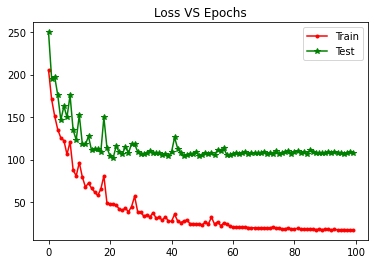

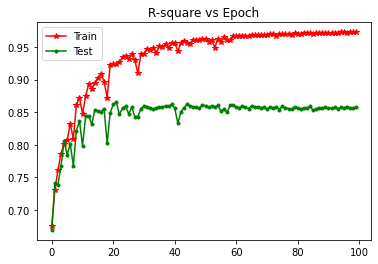

the last train_R is: 0.9728563200948105
the last test_R is: 0.858011607022693


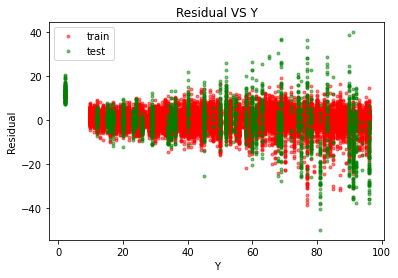

the result for the bs : 520


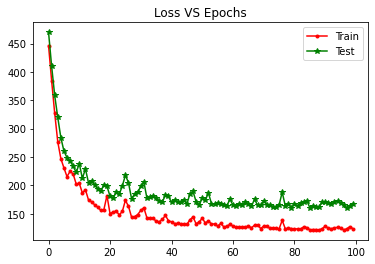

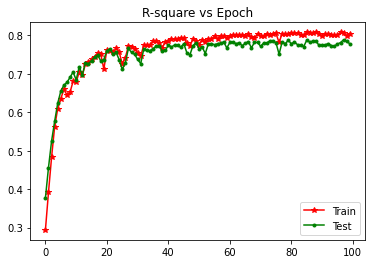

the last train_R is: 0.8048162679204893
the last test_R is: 0.7781934989144667


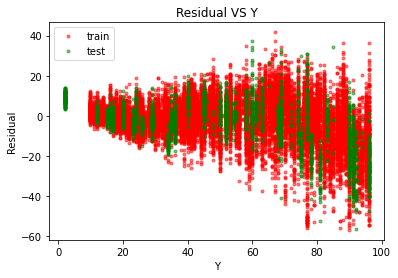

In [14]:


#plot
    plt.plot(train_loss,'r.-',label = 'Train')
    plt.plot(test_loss,'g*-',label = 'Test')
    plt.title('Loss VS Epochs')
    plt.legend()
    plt.show()

    plt.title('R-square vs Epoch')
    plt.plot(train_r,'r*-',label = 'Train')
    plt.plot(test_r,'g.-',label = 'Test')
    plt.legend()
    plt.show()

    print("the last train_R is:",train_r[-1])
    print("the last test_R is:",test_r[-1])

    plt.plot(train_label,train_outlabel - train_label,'r.',label = 'train',alpha = 0.5)
    plt.plot(test_label,test_outlabel - test_label,'g.',label = 'test',alpha = 0.5)
    plt.title('Residual VS Y')
    plt.xlabel('Y')
    plt.ylabel('Residual')
    plt.legend()
    plt.show()